In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train=pd.read_csv("Corona_NLP_train.csv", encoding='latin1')

test=pd.read_csv("Corona_NLP_test.csv", encoding='latin1')

df = pd.concat([train, test])

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [28]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'sentiment_encoded'],
      dtype='object')

In [15]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [31]:
#missing values in lOCATION replaced with string 'Unknown'
df['Location'].fillna('Unknown', inplace=True)

print(df.isnull().sum())

UserName             0
ScreenName           0
Location             0
TweetAt              0
OriginalTweet        0
Sentiment            0
sentiment_encoded    0
dtype: int64


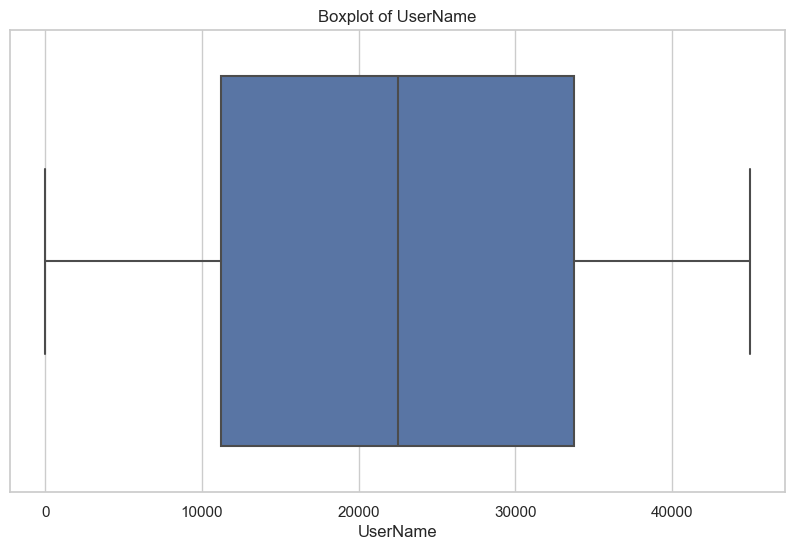

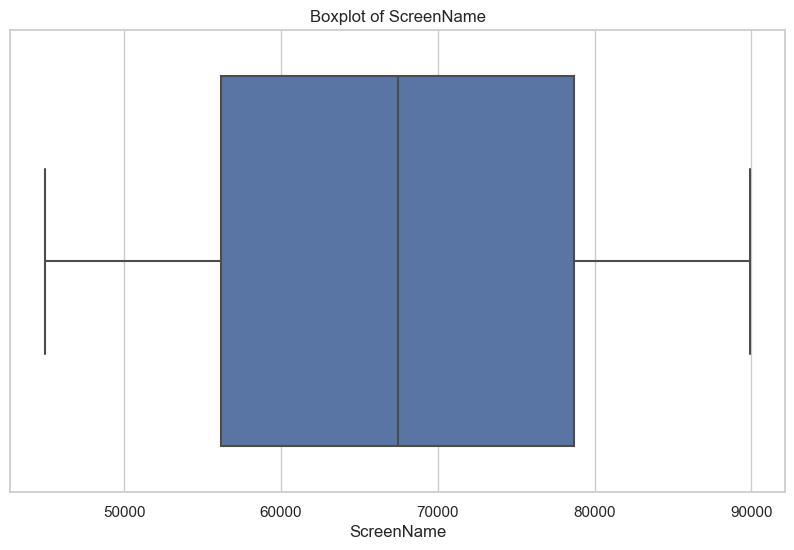

In [33]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

# Boxplot for each variable in numerical list

for col in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

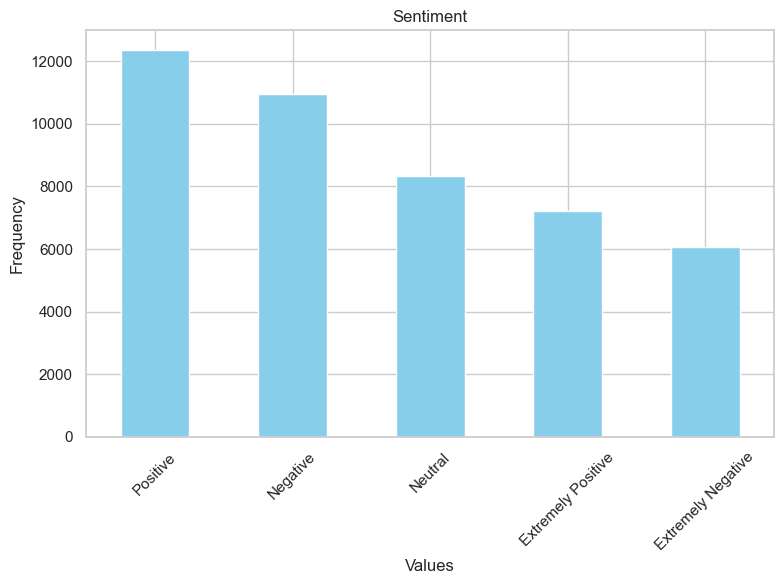

In [34]:
value_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])